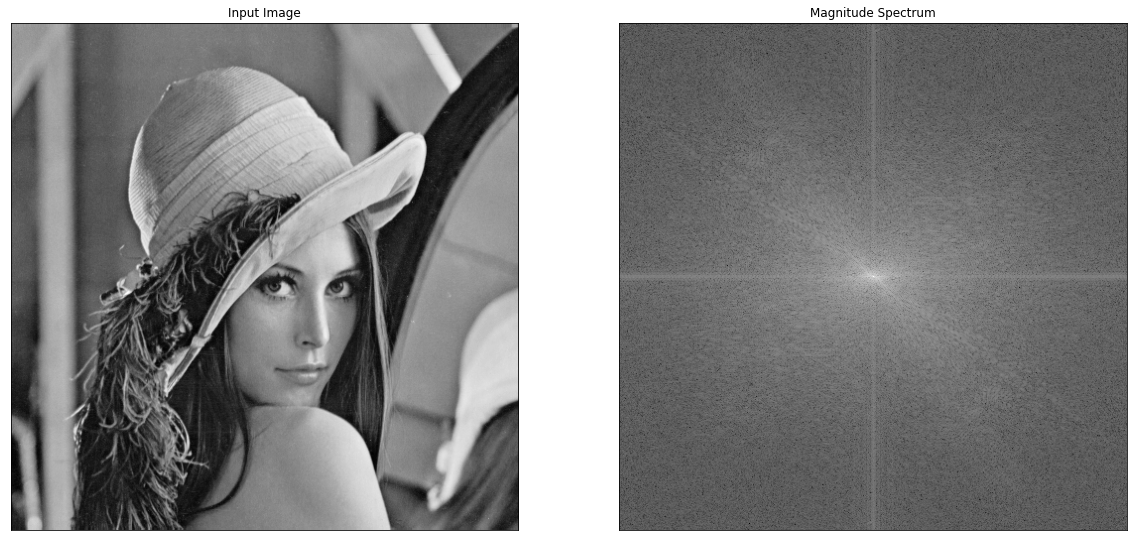

[[[ 3.2386628e+07  0.0000000e+00]
  [-4.5579094e+05  2.3925030e+06]
  [ 1.5359316e+06 -1.1356065e+06]
  ...
  [-2.3693586e+05 -6.3528781e+05]
  [ 1.5359316e+06  1.1356065e+06]
  [-4.5579094e+05 -2.3925030e+06]]

 [[-3.0137123e+04 -1.2242042e+06]
  [-1.5871196e+06  1.5933555e+06]
  [-1.1060898e+06  7.8740000e+04]
  ...
  [ 6.5133862e+05  8.1310194e+05]
  [-3.5540222e+05  4.4716316e+05]
  [ 3.5463902e+04  9.4627962e+05]]

 [[-4.4975650e+05 -1.6289345e+05]
  [-2.7495947e+05 -1.3278725e+05]
  [ 6.6756088e+05 -4.5574238e+05]
  ...
  [ 3.5242103e+05  9.2697106e+05]
  [-7.2358819e+05 -1.7574775e+05]
  [ 8.2125988e+05 -6.4096258e+04]]

 ...

 [[ 5.1651397e+05 -2.1507692e+05]
  [ 7.3533919e+05  7.0804450e+05]
  [-5.2637262e+05 -2.0108100e+05]
  ...
  [ 9.9332419e+05  1.1541597e+05]
  [ 1.3357222e+05 -6.7807012e+05]
  [-5.6356586e+04  6.0333169e+05]]

 [[-4.4975647e+05  1.6289345e+05]
  [ 8.2125988e+05  6.4096258e+04]
  [-7.2358819e+05  1.7574775e+05]
  ...
  [-5.1450753e+05 -7.5600194e+05]
  [ 

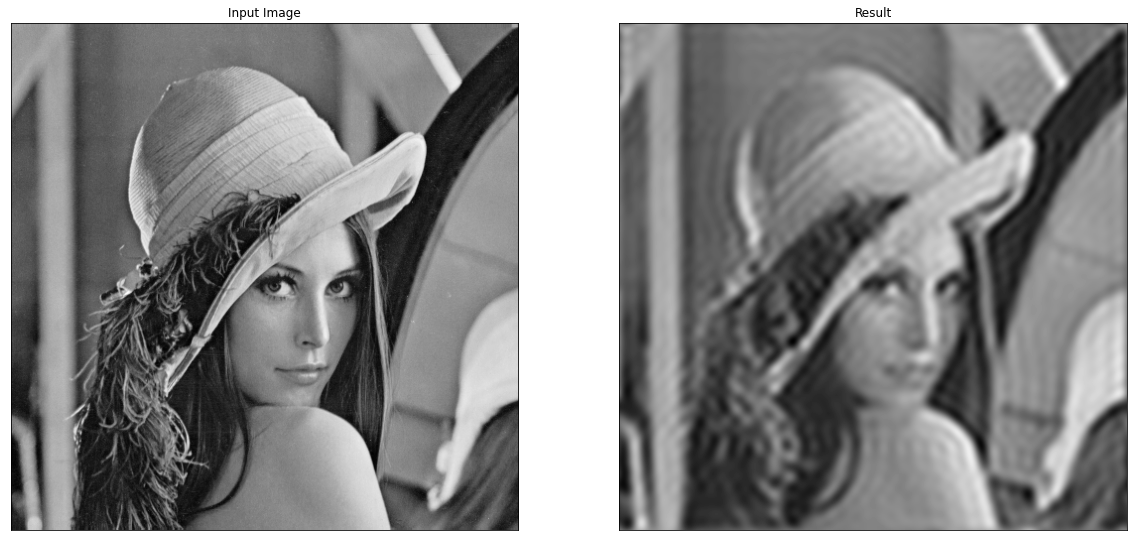

In [2]:
from concurrent.futures import thread
import enum
import cv2
from cv2 import TM_SQDIFF
import numpy as np#数值计算工具包
import matplotlib.pyplot as plt

#傅里叶变换和傅里叶逆变换
img=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna.png',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)#dft是一个三维数组，实部虚部
dft_shift = np.fft.fftshift(dft)

# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)#滤波后再逆变换的结果也是复数，三维
print(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()                